In [104]:
from fbprophet import Prophet
from matplotlib import pyplot
import pandas as pd
import numpy as np
from numpy import log
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [105]:
from pytrends.request import TrendReq
pytrends = TrendReq(hl='en-US', tz=360)

In [106]:
kw_list1 = ['Roofing materials']
kw_list2 = ['GAF Timberline HD']
kw_list3 = ['Carlisle']
kw_list4 = ['gaf shingles']

# print(kw_list4, kw_list1, kw_list2, kw_list3)
# kw_list = kw_list4 + kw_list1 + kw_list2 + kw_list3
# print(kw_list)

In [107]:
pytrends.build_payload(kw_list1, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df1 = pytrends.interest_over_time()
interest_over_time_df1 = interest_over_time_df1.drop(columns=['isPartial'])

print(interest_over_time_df1)

            Roofing materials
date                         
2014-09-21                 82
2014-09-28                 85
2014-10-05                 79
2014-10-12                 81
2014-10-19                 73
...                       ...
2019-08-18                 64
2019-08-25                 56
2019-09-01                 66
2019-09-08                 44
2019-09-15                 32

[261 rows x 1 columns]


In [108]:
pytrends.build_payload(kw_list2, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df2 = pytrends.interest_over_time()
interest_over_time_df2 = interest_over_time_df2.drop(columns=['isPartial'])

print(interest_over_time_df2)

            GAF Timberline HD
date                         
2014-09-21                 38
2014-09-28                 35
2014-10-05                 41
2014-10-12                 43
2014-10-19                 23
...                       ...
2019-08-18                 55
2019-08-25                 49
2019-09-01                 49
2019-09-08                 71
2019-09-15                 43

[261 rows x 1 columns]


In [109]:
pytrends.build_payload(kw_list3, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df3 = pytrends.interest_over_time()
interest_over_time_df3 = interest_over_time_df3.drop(columns=['isPartial'])

print(interest_over_time_df3)

            Carlisle
date                
2014-09-21        72
2014-09-28        79
2014-10-05        70
2014-10-12        75
2014-10-19        67
...              ...
2019-08-18        89
2019-08-25        77
2019-09-01        79
2019-09-08        77
2019-09-15        72

[261 rows x 1 columns]


In [110]:
pytrends.build_payload(kw_list4, timeframe='today 5-y', geo='US', gprop='')
interest_over_time_df4 = pytrends.interest_over_time()
interest_over_time_df4 = interest_over_time_df4.drop(columns=['isPartial'])

print(interest_over_time_df4)

            gaf shingles
date                    
2014-09-21            75
2014-09-28            55
2014-10-05            66
2014-10-12            77
2014-10-19            74
...                  ...
2019-08-18            93
2019-08-25            84
2019-09-01            71
2019-09-08            88
2019-09-15            61

[261 rows x 1 columns]


In [111]:
interest_over_time_df = pd.concat([interest_over_time_df1,interest_over_time_df2,interest_over_time_df3,interest_over_time_df4], axis=1)
print(interest_over_time_df)

            Roofing materials  GAF Timberline HD  Carlisle  gaf shingles
date                                                                    
2014-09-21                 82                 38        72            75
2014-09-28                 85                 35        79            55
2014-10-05                 79                 41        70            66
2014-10-12                 81                 43        75            77
2014-10-19                 73                 23        67            74
...                       ...                ...       ...           ...
2019-08-18                 64                 55        89            93
2019-08-25                 56                 49        77            84
2019-09-01                 66                 49        79            71
2019-09-08                 44                 71        77            88
2019-09-15                 32                 43        72            61

[261 rows x 4 columns]


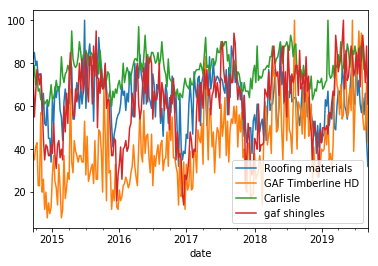

In [112]:
pd.plotting.register_matplotlib_converters()
interest_over_time_df.plot()
pyplot.show()

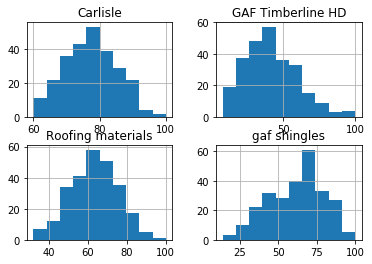

In [113]:
interest_over_time_df.hist()
pyplot.show()

Check for Stationarity



In [114]:
#Check for Stationarity
# gaf shingles, Roofing materials and Carlisle are stationary time series

X1, X2 = np.array_split(interest_over_time_df['gaf shingles'], 2)

mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=56.503817, mean2=66.638462
variance1=301.774985, variance2=261.751998


In [115]:
#GAF Timberline HD is non-stationary timeseries
X3, X4 = np.array_split(interest_over_time_df['GAF Timberline HD'], 2)

mean3, mean4 = X3.mean(), X4.mean()
var3, var4 = X3.var(), X4.var()
print('mean1=%f, mean2=%f' % (mean3, mean4))
print('variance1=%f, variance2=%f' % (var3, var4))


mean1=31.931298, mean2=51.223077
variance1=160.418321, variance2=302.484735


In [116]:
# #Log Tranformation
# #Taking log to flatten out exponential change back to a linear relationship.
# interest_over_time_df['GAF Timberline HD'] = log(interest_over_time_df['GAF Timberline HD'])
# pyplot.hist(interest_over_time_df['GAF Timberline HD'])
# pyplot.show()
# pyplot.plot(interest_over_time_df['GAF Timberline HD'])
# pyplot.show()

In [117]:
# X3, X4 = np.array_split(interest_over_time_df['GAF Timberline HD'], 2)

# mean3, mean4 = X3.mean(), X4.mean()
# var3, var4 = X3.var(), X4.var()
# print('mean1=%f, mean2=%f' % (mean3, mean4))
# print('variance1=%f, variance2=%f' % (var3, var4))

Non-Stationary to Stationary (Smoothing – taking rolling averages)

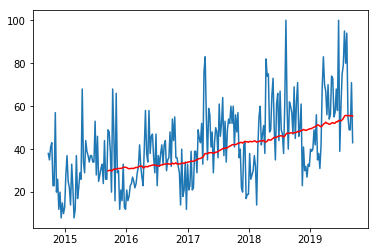

In [118]:
moving_avg = interest_over_time_df['GAF Timberline HD'].rolling(52).mean()
pyplot.plot(interest_over_time_df['GAF Timberline HD'])
pyplot.plot(moving_avg, color='red')


In [119]:
ts_log_moving_avg_diff = interest_over_time_df['GAF Timberline HD'] - moving_avg
ts_log_moving_avg_diff


date
2014-09-21          NaN
2014-09-28          NaN
2014-10-05          NaN
2014-10-12          NaN
2014-10-19          NaN
                ...    
2019-08-18    -0.519231
2019-08-25    -6.692308
2019-09-01    -6.442308
2019-09-08    15.346154
2019-09-15   -12.384615
Name: GAF Timberline HD, Length: 261, dtype: float64

In [120]:
def test_stationarity(ts):

    #Determing rolling statistics
    ts = interest_over_time_df['GAF Timberline HD']
    rolmean = ts.rolling(52).mean()
    rolstd = ts.rolling(52).std()

    #Plot rolling statistics:
    orig = pyplot.plot(ts, color='blue',label='Original')
    mean = pyplot.plot(rolmean, color='red', label='Rolling Mean')
    std = pyplot.plot(rolstd, color='black', label = 'Rolling Std')
    pyplot.legend(loc='best')
    pyplot.title('Rolling Mean & Standard Deviation')
    pyplot.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

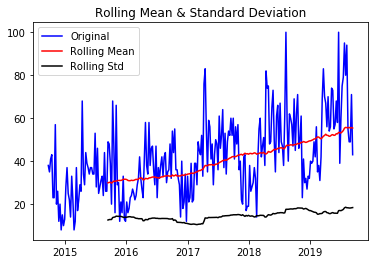

Results of Dickey-Fuller Test:
Test Statistic                  -2.832885
p-value                          0.053728
#Lags Used                       4.000000
Number of Observations Used    256.000000
Critical Value (10%)            -2.572822
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
dtype: float64
date
2015-09-13    19.076923
2015-09-20    17.884615
2015-09-27     8.807692
2015-10-04    -9.788462
2015-10-11    37.730769
                ...    
2019-08-18    -0.519231
2019-08-25    -6.692308
2019-09-01    -6.442308
2019-09-08    15.346154
2019-09-15   -12.384615
Name: GAF Timberline HD, Length: 210, dtype: float64


In [121]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)
print(ts_log_moving_avg_diff)

AUGMENTED DICKEY-FULLER TEST (to check for stationary ts)

In [122]:
#Augmented Dickey-Fuller test
A1 = interest_over_time_df['gaf shingles']
print(len(A1))

result = adfuller(A1, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

261
ADF Statistic: -4.219268
p-value: 0.000611
Critical Values:
	10%: -2.573
	1%: -3.457
	5%: -2.873


In [123]:
A2 = interest_over_time_df['Roofing materials']
print(len(A2))

result = adfuller(A2, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

261
ADF Statistic: -4.289651
p-value: 0.000463
Critical Values:
	10%: -2.573
	1%: -3.456
	5%: -2.873


In [124]:
A3 = interest_over_time_df['Carlisle']
print(len(A3))

result = adfuller(A3, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

261
ADF Statistic: -5.500447
p-value: 0.000002
Critical Values:
	10%: -2.573
	1%: -3.457
	5%: -2.873


In [125]:
A4 = ts_log_moving_avg_diff
print(len(A4))

result = adfuller(A4, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

210
ADF Statistic: -4.000542
p-value: 0.001408
Critical Values:
	10%: -2.574
	1%: -3.462
	5%: -2.876


In [126]:
#granger_test_result = grangercausalitytests(interest_over_time_df.loc[:,['GAF Timberline HD','gaf shingles']], maxlag=12, verbose=False)
grangercausalitytests(interest_over_time_df[['GAF Timberline HD','gaf shingles']], maxlag=2)

# optimal_lag = -1
# F_test = -1.0
# for key in granger_test_result.keys():
#     _F_test_ = granger_test_result[key][0]['params_ftest'][0]
#     if _F_test_ > F_test:
#         F_test = _F_test_
#         optimal_lag = key
        
        
#         print(optimal_lag)
        
#print(granger_test_result)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.8723 , p=0.0000  , df_denom=257, df_num=1
ssr based chi2 test:   chi2=26.1743 , p=0.0000  , df=1
likelihood ratio test: chi2=24.9391 , p=0.0000  , df=1
parameter F test:         F=25.8723 , p=0.0000  , df_denom=257, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.2216  , p=0.0003  , df_denom=254, df_num=2
ssr based chi2 test:   chi2=16.7669 , p=0.0002  , df=2
likelihood ratio test: chi2=16.2465 , p=0.0003  , df=2
parameter F test:         F=8.2216  , p=0.0003  , df_denom=254, df_num=2


{1: ({'lrtest': (24.939066006612848, 5.917116064012888e-07, 1),
   'params_ftest': (25.872302964460975, 7.041355549185272e-07, 257.0, 1.0),
   'ssr_chi2test': (26.174314283112206, 3.119443769617839e-07, 1),
   'ssr_ftest': (25.87230296446091, 7.041355549185499e-07, 257.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (16.246477059668905, 0.00029656666356671764, 2),
   'params_ftest': (8.221584172584054, 0.0003469189935697488, 254.0, 2.0),
   'ssr_chi2test': (16.76685276141158, 0.0002286252447540427, 2),
   'ssr_ftest': (8.221584172584057, 0.0003469189935697488, 254.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [39]:
grangercausalitytests(interest_over_time_df[['Roofing materials','Carlisle']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=16.9064 , p=0.0001  , df_denom=256, df_num=1
ssr based chi2 test:   chi2=17.1046 , p=0.0000  , df=1
likelihood ratio test: chi2=16.5635 , p=0.0000  , df=1
parameter F test:         F=16.9064 , p=0.0001  , df_denom=256, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=10.6002 , p=0.0000  , df_denom=253, df_num=2
ssr based chi2 test:   chi2=21.6193 , p=0.0000  , df=2
likelihood ratio test: chi2=20.7611 , p=0.0000  , df=2
parameter F test:         F=10.6002 , p=0.0000  , df_denom=253, df_num=2


{1: ({'lrtest': (16.56346412808989, 4.7048747931576855e-05, 1),
   'params_ftest': (16.906444804826293, 5.293934304663831e-05, 256.0, 1.0),
   'ssr_chi2test': (17.104567204894813, 3.537712838978547e-05, 1),
   'ssr_ftest': (16.906444804838117, 5.293934304632917e-05, 256.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (20.76111988275693, 3.10298801662663e-05, 2),
   'params_ftest': (10.600161573708771, 3.7944488353250865e-05, 253.0, 2.0),
   'ssr_chi2test': (21.619301865745943, 2.020357613433522e-05, 2),
   'ssr_ftest': (10.600161573708766, 3.7944488353250865e-05, 253.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [40]:
grangercausalitytests(interest_over_time_df[['GAF Timberline HD','Roofing materials']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2503  , p=0.0726  , df_denom=256, df_num=1
ssr based chi2 test:   chi2=3.2884  , p=0.0698  , df=1
likelihood ratio test: chi2=3.2677  , p=0.0707  , df=1
parameter F test:         F=3.2503  , p=0.0726  , df_denom=256, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1264  , p=0.3258  , df_denom=253, df_num=2
ssr based chi2 test:   chi2=2.2973  , p=0.3171  , df=2
likelihood ratio test: chi2=2.2871  , p=0.3187  , df=2
parameter F test:         F=1.1264  , p=0.3258  , df_denom=253, df_num=2


{1: ({'lrtest': (3.2677149387814097, 0.07065597639482102, 1),
   'params_ftest': (3.2503259721385196, 0.07258519192754098, 256.0, 1.0),
   'ssr_chi2test': (3.2884157296245418, 0.06977031233741761, 1),
   'ssr_ftest': (3.250325972138543, 0.07258519192753912, 256.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (2.2870931639631635, 0.318686766441234, 2),
   'params_ftest': (1.126369917338349, 0.32582826642788487, 253.0, 2.0),
   'ssr_chi2test': (2.2972603847695234, 0.3170707980370269, 2),
   'ssr_ftest': (1.1263699173385453, 0.32582826642782126, 253.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [41]:
grangercausalitytests(interest_over_time_df[['Roofing materials','gaf shingles']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=25.2179 , p=0.0000  , df_denom=256, df_num=1
ssr based chi2 test:   chi2=25.5134 , p=0.0000  , df=1
likelihood ratio test: chi2=24.3337 , p=0.0000  , df=1
parameter F test:         F=25.2179 , p=0.0000  , df_denom=256, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.0343  , p=0.0011  , df_denom=253, df_num=2
ssr based chi2 test:   chi2=14.3466 , p=0.0008  , df=2
likelihood ratio test: chi2=13.9619 , p=0.0009  , df=2
parameter F test:         F=7.0343  , p=0.0011  , df_denom=253, df_num=2


{1: ({'lrtest': (24.333675558930736, 8.101035701743201e-07, 1),
   'params_ftest': (25.217912962294, 9.607308714579545e-07, 256.0, 1.0),
   'ssr_chi2test': (25.513435379821175, 4.3931304587482205e-07, 1),
   'ssr_ftest': (25.21791296229429, 9.6073087145783e-07, 256.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (13.961912615012352, 0.00092941397252546, 2),
   'params_ftest': (7.034283289139589, 0.0010640568526086031, 253.0, 2.0),
   'ssr_chi2test': (14.346601490889437, 0.0007667875789742996, 2),
   'ssr_ftest': (7.03428328913765, 0.001064056852610559, 253.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [42]:
grangercausalitytests(interest_over_time_df[['gaf shingles','Roofing materials']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=21.5353 , p=0.0000  , df_denom=256, df_num=1
ssr based chi2 test:   chi2=21.7876 , p=0.0000  , df=1
likelihood ratio test: chi2=20.9196 , p=0.0000  , df=1
parameter F test:         F=21.5353 , p=0.0000  , df_denom=256, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=8.4623  , p=0.0003  , df_denom=253, df_num=2
ssr based chi2 test:   chi2=17.2591 , p=0.0002  , df=2
likelihood ratio test: chi2=16.7063 , p=0.0002  , df=2
parameter F test:         F=8.4623  , p=0.0003  , df_denom=253, df_num=2


{1: ({'lrtest': (20.919565898190058, 4.789771979564575e-06, 1),
   'params_ftest': (21.535254728293786, 5.550760687935584e-06, 256.0, 1.0),
   'ssr_chi2test': (21.78762099464102, 3.0455881743919753e-06, 1),
   'ssr_ftest': (21.53525472829383, 5.550760687935584e-06, 256.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (16.706295756332338, 0.00023565354100444846, 2),
   'params_ftest': (8.46228816588538, 0.00027706313117960556, 253.0, 2.0),
   'ssr_chi2test': (17.25905412488909, 0.00017874916236974083, 2),
   'ssr_ftest': (8.462288165885544, 0.00027706313117956404, 253.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}